# Exploratory Data Analysis 

In [129]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split

from scipy import stats

### 1a. Import Cleaned Khan Data set 

In [2]:
khan_data = pd.read_csv('./data/return_user.csv')

In [3]:
# Categorical data is prevelant so this EDA is to asking questions and answering with data 
# Example how many users are from the US? 
# Are all returned users from the US? What type of users are more likely to return with OS?
# Bar chart to count how many users 
# Make a new column of returned user of Yes and No -> call it label with Yes and No 
# chi2 to find corr between categorical variables 

### 1b. Exploring the data

In [4]:
khan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31481 entries, 0 to 31480
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            31481 non-null  int64 
 1   timestamp             31481 non-null  object
 2   user_id               31481 non-null  int64 
 3   session_id            31481 non-null  int64 
 4   country               31481 non-null  object
 5   language              31481 non-null  object
 6   user_registered_flag  31481 non-null  bool  
 7   device_type           31481 non-null  object
 8   KA_app_flag           31481 non-null  bool  
 9   OS                    31481 non-null  object
 10  URI                   26149 non-null  object
 11  conversion            31481 non-null  object
 12  returned_user         31481 non-null  int64 
 13  returner              31481 non-null  object
dtypes: bool(2), int64(4), object(8)
memory usage: 2.9+ MB


In [5]:
khan_data.head()

,Unnamed: 0,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,returned_user,returner
0,0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,1,Yes
1,1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,1,Yes
2,2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,1,Yes
3,3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,1,Yes
4,4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,1,Yes


In [6]:
khan_data = khan_data.drop(['Unnamed: 0'], axis =1)

In [7]:
# Verify the dimensions of the data set
print("There are:", khan_data.shape[0], 'rows.')
print("There are:", khan_data.shape[1], 'columns.')

There are: 31481 rows.
There are: 13 columns.


### What country are the returned users from?

In [22]:
df = khan_data.groupby('user_id').sum()

In [24]:
df.head()

,session_id,user_registered_flag,KA_app_flag,returned_user
user_id,,,,
461023995001001,1.574111e+20,139,0,139
3899589871790001,1.268540e+19,9,0,0
6937833080824001,-3.123441e+19,0,0,0
8828372710491001,-1.650525e+20,0,0,0
9396148830887001,-5.837858e+18,0,0,11


In [50]:
return_df = khan_data[khan_data['returned_user'] > 0]

In [51]:
return_df.head(5)

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,returned_user,returner
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,1,Yes
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,1,Yes
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,1,Yes
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,1,Yes
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,1,Yes


In [53]:
return_df.describe()
# Verify dataframe consist of only returned users

,user_id,session_id,returned_user
count,2.179000e+04,2.179000e+04,21790.000000
mean,4.807244e+18,-2.074884e+17,3.426251
std,2.699985e+18,5.207333e+18,3.055689
min,4.610240e+14,-9.221803e+18,1.000000
25%,2.527038e+18,-4.523321e+18,1.000000
50%,5.059945e+18,-2.042856e+17,2.000000
75%,7.032804e+18,4.150092e+18,4.000000
max,9.185771e+18,9.212772e+18,13.000000


In [58]:
return_df.drop_duplicates(subset='user_id', keep='last')

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,returned_user,returner
138,2016-02-19 16:19:11.355615 UTC,461023995001001,-5655212259149079409,US,en,True,desktop,False,Windows,"""/mission/cc-fifth-grade-math""",pageview,1,Yes
209,2016-02-20 03:45:32.362904 UTC,9396148830887001,-778335911492825326,US,en,False,tablet,False,iOS,"""/science/health-and-medicine/human-anatomy-an...",pageview,1,Yes
243,2016-02-21 15:28:10.721395 UTC,74637567607782001,7162126794463536697,AE,en,True,desktop,False,Windows,"""/search""",pageview,1,Yes
275,2016-02-21 17:06:23.010416 UTC,81767633900011001,7119046949360524718,US,en,True,desktop,False,Mac OS X,"""/search""",pageview,2,Yes
313,2016-02-21 00:40:44.980191 UTC,83959543776228001,-6665995564916180123,NZ,en,True,desktop,False,Windows,"""/mission/algebra-basics/task/4504950610984960""",pageview,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31205,2016-02-18 19:21:08.784572 UTC,9122425802682030001,2088240948503387981,US,en,True,desktop,False,Windows,"""/computing/hour-of-code/hour-of-drawing-code/...",pageview,1,Yes
31236,2016-02-15 23:44:58.981123 UTC,9159091238978455001,5070113962107293020,AU,en,False,phone,False,iOS,"""/humanities/history/ancient-medieval/medieval...",pageview,1,Yes
31265,2016-02-19 16:56:44.264519 UTC,9163646750174043001,-780356836992673019,US,en,True,desktop,False,Chrome OS,NaN,video_started,4,Yes
31267,2016-02-20 21:15:50.377342 UTC,9167644762374088001,-5211036702150541581,MY,en,False,desktop,False,Windows,"""/science/chemistry/periodic-table/periodic-ta...",pageview,1,Yes


In [59]:
return_df.head()

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,returned_user,returner
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,1,Yes
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,1,Yes
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,1,Yes
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,1,Yes
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,1,Yes


In [27]:
khan_data.country.describe()

count     31481
unique       77
top          US
freq      21973
Name: country, dtype: object

In [60]:
return_df.groupby(by='country').size().sort_values(ascending=False)

country
US    14761
CA     1529
IE      992
BR      461
GB      441
NL      417
AU      350
NZ      330
IN      278
ZA      247
ES      226
RU      210
MX      209
NO      154
PT      140
CN      118
SG       88
DE       87
JP       72
GT       66
MY       66
KH       54
DK       53
RW       50
IL       46
NG       38
BD       38
RS       36
SE       28
EG       27
PL       24
AE       21
JM       20
KR       19
ID       16
UA       16
TR       15
KE       14
PH       13
TT       13
BZ        3
AT        2
GU        2
dtype: int64

In [64]:
khan_data.groupby(by='country').size().sort_values(ascending=False)

country
US    21973
CA     1842
IE     1049
GB      649
BR      617
      ...  
CI        2
GU        2
AM        1
MA        1
DO        1
Length: 77, dtype: int64

We can see that the US has the most returned users, with Canada second

We would expect that English is the most common language - lets confirm 

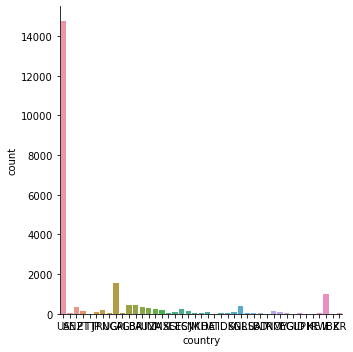

In [102]:
sns.catplot(x='country', kind='count', data=return_df)
plt.show()

In [136]:
mapping = {'US':'USA', 'CA':'NA', 'IE':'UK', 'BR':'SA', 'GB':'UK', 'NL':'P', 'AU':'P', 'NZ':'P', 'IN':'AS', 'ZA':'AF',
'ES':'EU', 'RU':'EU', 'MX':'NA', 'NO':'EU', 'PT':'EU', 'CN':'AS', 'SG':'AS', 'DE':'EU', 'JP':'AS', 'GT': 'SA',
 'MY':'AS', 'KH':'AS', 'DK':'EU', 'RW':'AF', 'IL':'ME', 'NG':'AF', 'BD':'AS', 'RS':'EU', 'SE':'EU', 'EG':'ME',
 'PL':'EU', 'AE':'ME', 'JM':'CAR', 'KR':'AS', 'ID':'AS', 'UA':'EU', 'TR':'EU', 'KE':'AF','PH':'AS', 'TT':'CAR',
 'BZ':'SA','AT':'EU', 'GU':'P'}

return_df['country_mapped'] = return_df.country.map(mapping)

/var/folders/fm/r8vdcc0j4hvbghm21g_f8gvh0000gn/T/ipykernel_55063/1008615516.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_df['country_mapped'] = return_df.country.map(mapping)


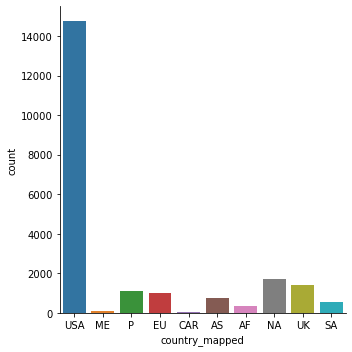

In [137]:
ax = sns.catplot(x='country_mapped', kind='count', data=return_df)
plt.show()

ME=Middle East, EU=Europe, CAR=Carribean, AS=Asia, AF= Africa, NA=North America(not including USA),
UK=United Kingdom, SA=South America, P= Pacific

In [132]:
khan_data.groupby(by='language').size().sort_values(ascending=False)

language
en         29697
es           904
pt           620
nb           161
pl            38
tr            24
da            19
fr            11
th             4
zh-HANS        2
de             1
dtype: int64

English is by far the most common language for returned users and users outside of the english speaking countries are learning in english. This is to be expected as most of Khan Academy's videos are in english

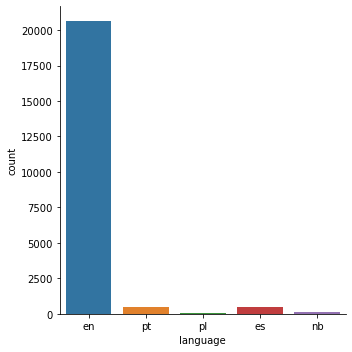

In [114]:
sns.catplot(x='language', kind='count', data=return_df)
plt.show()

In [67]:
khan_data.groupby(by='user_registered_flag').size().sort_values(ascending=False)

user_registered_flag
True     26140
False     5341
dtype: int64

In [66]:
return_df.groupby(by='user_registered_flag').size().sort_values(ascending=False)

user_registered_flag
True     19711
False     2079
dtype: int64

Most of the returned users are also registered users, this makes sense as a return user would want to track their videos. Interestingly a large portion of non-return users are registered users, this could be due to that the data is just for the month of Feburary and these people are return users that return after a month 

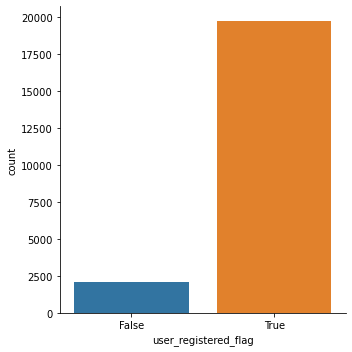

In [115]:
sns.catplot(x='user_registered_flag', kind='count', data=return_df)
plt.show()

In [69]:
khan_data.groupby(by='device_type').size().sort_values(ascending=False)

device_type
desktop          26885
tablet            2717
phone             1872
unknown/other        7
dtype: int64

In [68]:
return_df.groupby(by='device_type').size().sort_values(ascending=False)

device_type
desktop    18622
tablet      2020
phone       1148
dtype: int64

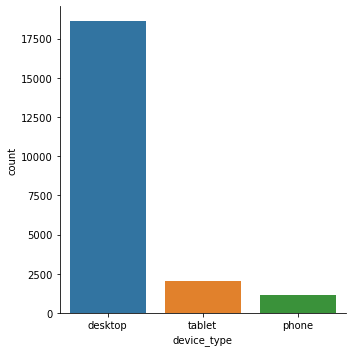

In [116]:
sns.catplot(x='device_type', kind='count', data=return_df)
plt.show()

Desktop is the most used device type that returned users are using. Thus, we would expect the app is not hevialy utilized.

In [71]:
khan_data.groupby(by='KA_app_flag').size().sort_values(ascending=False)

KA_app_flag
False    30885
True       596
dtype: int64

In [70]:
return_df.groupby(by='KA_app_flag').size().sort_values(ascending=False)

KA_app_flag
False    21387
True       403
dtype: int64

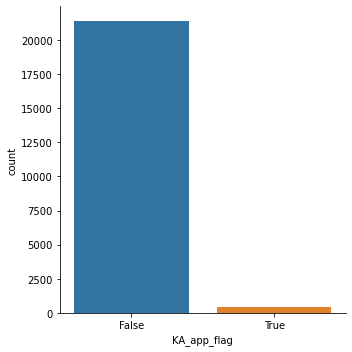

In [138]:
sns.catplot(x='KA_app_flag', kind='count', data=return_df)
plt.show()

As expected the Khan Academy app is not a platform that is heavily utilized. 

In [73]:
khan_data.groupby(by='OS').size().sort_values(ascending=False)

OS
Windows          17124
Mac OS X          5505
Chrome OS         3739
iOS               2966
Android           1504
Ubuntu             439
Linux              180
Windows Phone       14
Other                7
BlackBerry OS        3
dtype: int64

In [72]:
return_df.groupby(by='OS').size().sort_values(ascending=False)

OS
Windows          12116
Mac OS X          3710
Chrome OS         2379
iOS               2022
Android           1055
Ubuntu             412
Linux               82
Windows Phone       14
dtype: int64

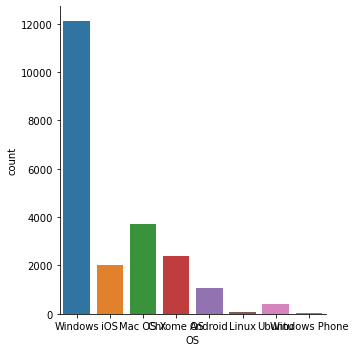

In [139]:
sns.catplot(x='OS', kind='count', data=return_df)
plt.show()

Most returned users are using Windows, this is expected as it is the dominant operating system. And as expected Mac OS is the second most as the most used device type is a desktop (computer). 

### Explore the dependant variable

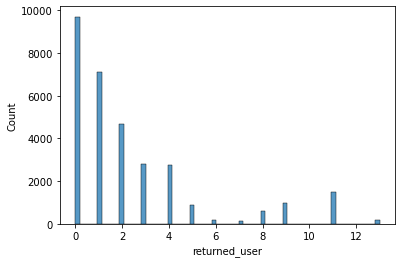

In [31]:
# Exploring the dependant variable of returned_user 
sns.histplot(data=khan_data, x="returned_user")
plt.show()

In [74]:
khan_data.returned_user.value_counts()

0     9691
1     7110
2     4685
3     2819
4     2740
11    1484
9      960
5      869
8      618
6      197
13     195
7      113
Name: returned_user, dtype: int64

We have 804 returned users and 30,677 non-returned users in the data set

In [77]:
khan_data.corr()

,user_id,session_id,user_registered_flag,KA_app_flag,returned_user
user_id,1.000000,-0.015130,0.013555,0.025828,0.209970
session_id,-0.015130,1.000000,-0.004922,0.019978,0.017478
user_registered_flag,0.013555,-0.004922,1.000000,-0.192436,0.223096
KA_app_flag,0.025828,0.019978,-0.192436,1.000000,0.021297
returned_user,0.209970,0.017478,0.223096,0.021297,1.000000


In [15]:
#Turning boolean values into 1,0
#khan_data.KA_app_flag = np.multiply(khan_data.KA_app_flag, 1)

In [16]:
#khan_data.user_registered_flag = np.multiply(khan_data.user_registered_flag, 1)